In [2]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import requests
import json
import sys
sys.path.append('../bgc-analysis')
import numpy as np
from datetime import datetime
from calc_sensor import o2_sbe
from get_cal_sn import get_cal

In [5]:
# /Users/katherineparise/Library/CloudStorage/GoogleDrive-katherine.parise@whoi.edu/Shared drives/WHOI Argo/BGC/Float Tracking/pressure_test_results
SN = 1489 #Update for each float
root = '/Users/katherineparise/Library/CloudStorage/GoogleDrive-katherine.parise@whoi.edu' #Update for user path
filelocation = root + '/Shared drives/WHOI Argo/BGC/Float Tracking/' + 'pressure_test_results/' + 'combined_test_results/' + str(SN) + '_pressure_test_results' + ".xlsx" #Update for user path 
df = pd.read_excel(filelocation)
display(df)

,Unnamed: 0,DATE,BUOYANCY_POSITION,ITERATION,HUMIDITY,PRES,TEMP,PSAL,O2_PHASE_DELAY,O2_TEMPERATURE_VOLTAGE,...,MCOMS2,MCOMS3,PH_VRS1,PH_VRS,PH_VK,PH_IK,PH_IB,PH_VIN,PH_VOUT,SN
0,0,2023-05-17 09:58:42.224,746,0,21.02,35.5,20.6440,31.984,24.400,0.635886,...,12163,319,-0.863638,-0.863352,-0.977268,-4.590000e-08,-2.200000e-08,7.03,7.06,1489
1,1,2023-05-17 10:00:10.030,697,1,20.92,33.8,20.6495,31.971,21.321,0.635695,...,12134,318,-0.864356,-0.863907,-0.977047,-4.600000e-08,-2.220000e-08,7.03,7.06,1489
2,2,2023-05-17 10:01:04.499,598,1,20.92,34.3,20.6561,31.971,20.573,0.635570,...,12030,317,-0.864744,-0.864081,-0.976621,-4.600000e-08,-2.100000e-08,7.03,7.06,1489
3,3,2023-05-17 10:01:58.932,598,1,20.86,35.6,20.6623,31.971,20.321,0.635419,...,12060,327,-0.864914,-0.864290,-0.976363,-4.670000e-08,-2.390000e-08,7.03,7.06,1489
4,4,2023-05-17 10:02:53.428,598,1,20.84,36.5,20.6679,31.971,20.234,0.635299,...,12244,318,-0.865093,-0.864442,-0.976154,-4.250000e-08,-2.120000e-08,7.03,7.06,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,857,2023-05-18 12:48:59.692,33,10,21.63,1535.2,20.7924,31.445,20.104,0.632726,...,10729,294,-0.876999,-0.876556,-0.975825,-4.370000e-08,-1.850000e-08,7.04,7.07,1489
858,858,2023-05-18 12:49:54.222,33,10,21.68,1721.7,20.8370,31.445,20.140,0.631815,...,10691,295,-0.877553,-0.877162,-0.976197,-4.740000e-08,-2.230000e-08,7.04,7.07,1489
859,859,2023-05-18 12:50:48.734,33,10,21.73,1908.3,20.8803,31.444,20.169,0.630954,...,10699,299,-0.878055,-0.877673,-0.976499,-4.320000e-08,-2.030000e-08,7.04,7.07,1489
860,860,2023-05-18 12:51:43.205,33,10,21.80,1650.0,20.7977,31.441,20.188,0.632844,...,10712,295,-0.877491,-0.876517,-0.975469,-4.230000e-08,-2.250000e-08,7.04,7.07,1489


In [ ]:
# Get calibration information using get_cal and float serial number 

meta = get_cal(SN)
meta

,CTD_CNDC,CTD_TEMP,CTD_PRES,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,SBE,DRUCK,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18115,18115,12254723,3253,370,370,370,1971,720-11976
SENSOR_CALIB_DATE,2022-09-11,2022-09-11,2022-09-07,2022-08-18,None,None,None,None,2022-09-19
COMMENTS,None,None,,None,,,,None,"added K2f0, K2f1, K2f2, K2f3; O-Ring: Si S"
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01875, 'H': 0.1392335, 'I': -0.000280...","{'TA0': -0.0008469718, 'TA1': 0.0002897291, 'T...","{'PA0': 0.3339194, 'PA1': 0.0003907655, 'PA2':...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 49, 'SCALE_CDOM': 0.005626}","{'DARK_CHLA': 51, 'SCALE_CHLA': 0.001868}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.0045929, -0.00626375, 99.0, 0.0007...","{'F0': -1.283306923356, 'F1': 1.423471091636e-..."


In [ ]:
# Get calibration coefficients for oxygen

cal  = meta["OPTODE_DOXY"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal

{'E': 0.011,
 'A0': 1.0513,
 'A1': -0.0015,
 'A2': 0.355163,
 'B0': -0.246014,
 'B1': 1.58518,
 'C0': 0.112287,
 'C1': 0.00477573,
 'C2': 6.75717e-05,
 'TA0': 0.000702993,
 'TA1': 0.00025092,
 'TA2': 7.14816e-07,
 'TA3': 9.65484e-08}

In [ ]:
# Set input variables 
# What about 'E'? coefficient? 

phase1= df['O2_PHASE_DELAY']
otv1= df['O2_TEMPERATURE_VOLTAGE']
pres1= df['PRES']
tem1= df['TEMP']
sal1= df['PSAL']

date = pd.to_datetime(df['DATE'])


In [ ]:
# Get actual values for each oxygen using o2_sbe function from calc_sensor  

(O2uM, tempO, O2mlL) = o2_sbe(cal, phase1, otv1, pres1, 
                              tem1, sal1, sref=0, B15=True)

(O2uM, tempO, O2mlL)

# Display summary stats to quickly check for odd values that could throw off a plot

display(print('o2uM'), O2uM.describe())
display(print('temp0'), tempO.describe())
display(print('o2mlL'), O2mlL.describe())

o2uM


None

count    862.000000
mean     163.402011
std        5.851313
min       88.834100
25%      158.602668
50%      165.692905
75%      168.191330
max      169.839896
dtype: float64

temp0


None

count    862.000000
mean      20.657853
std        0.171575
min       20.183066
25%       20.546846
50%       20.673043
75%       20.784160
max       21.002388
Name: O2_TEMPERATURE_VOLTAGE, dtype: float64

o2mlL


None

count    862.000000
mean       3.658832
std        0.131020
min        1.989138
25%        3.551368
50%        3.710129
75%        3.766073
max        3.802987
dtype: float64

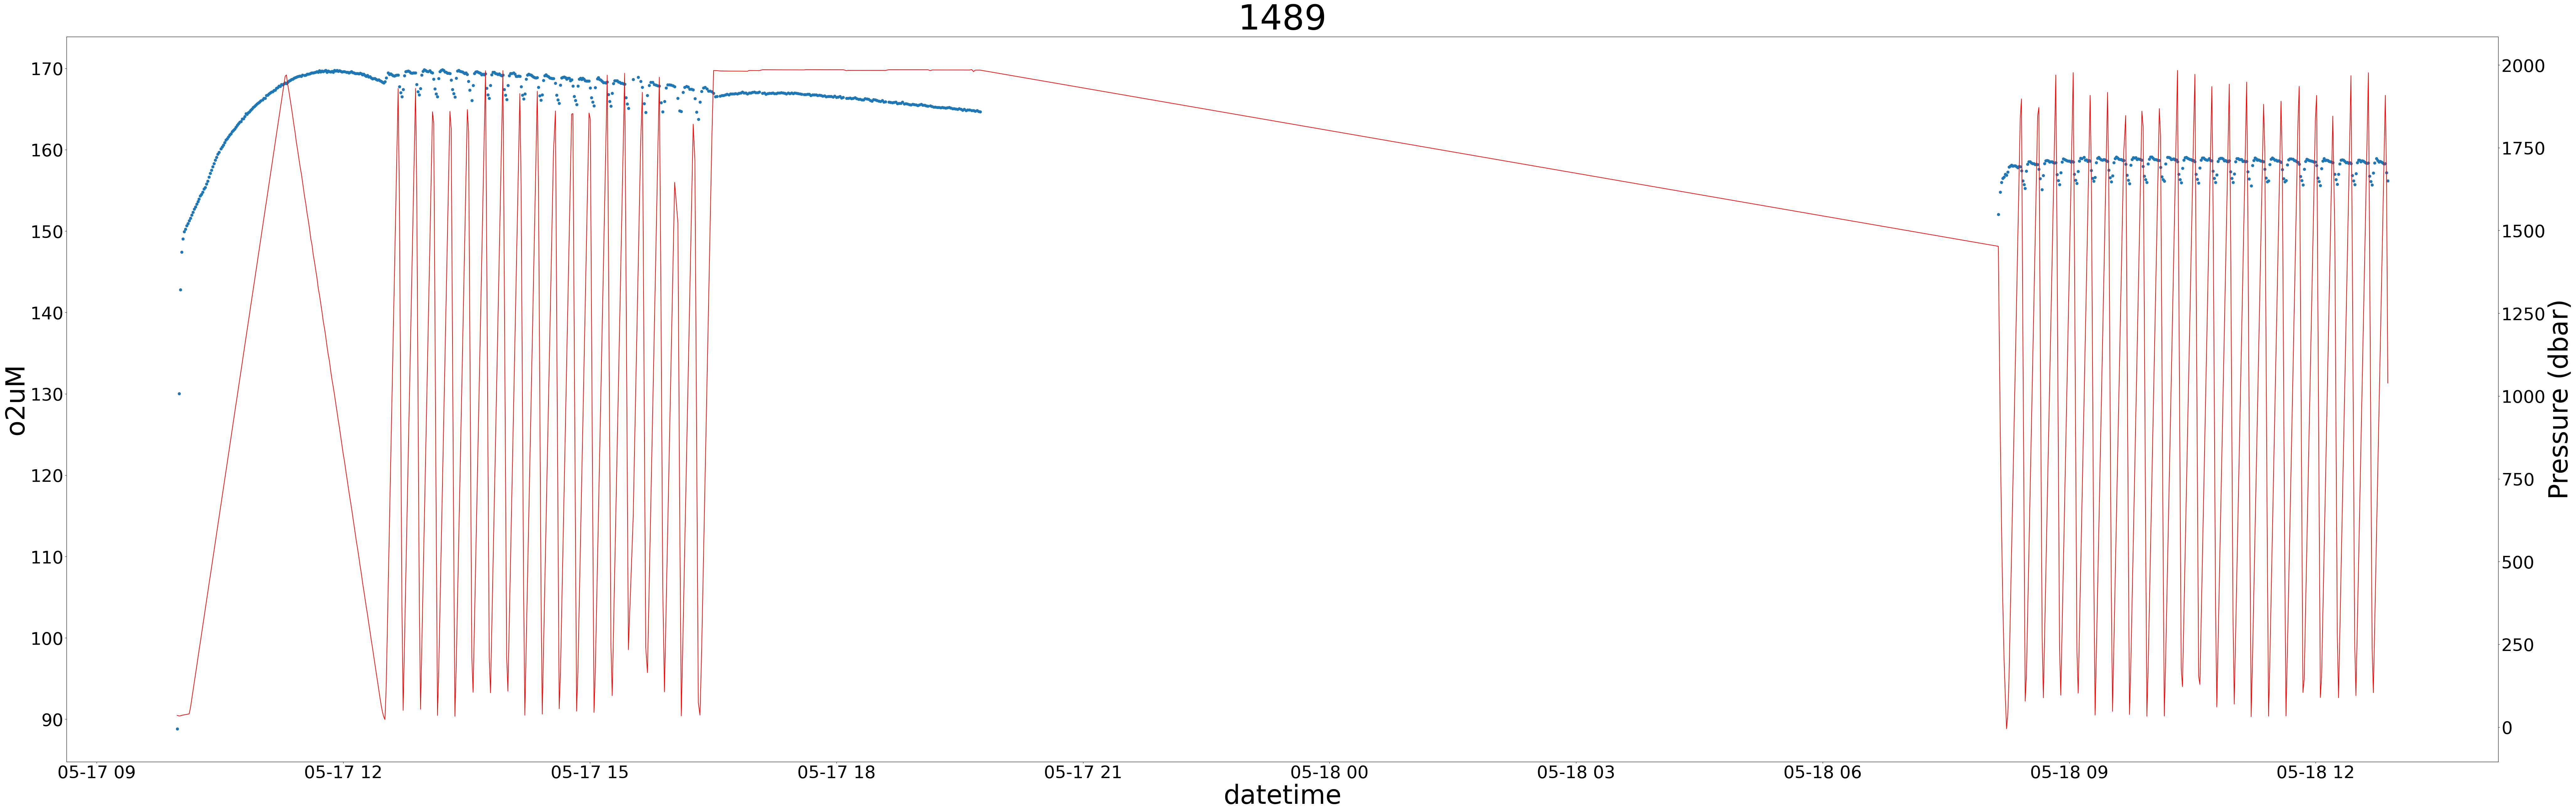

In [ ]:
# dual-axes scatter plot for o2uM and pressure 

fig, ax = plt.subplots()
fig.set_size_inches(100, 30) #Made a little smaller (200 -> 100)
ax.plot_date(date, O2uM) 
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('o2uM', fontsize = 60) 
ax2 = ax.twinx()
ax2.plot(date, df['PRES'], color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)

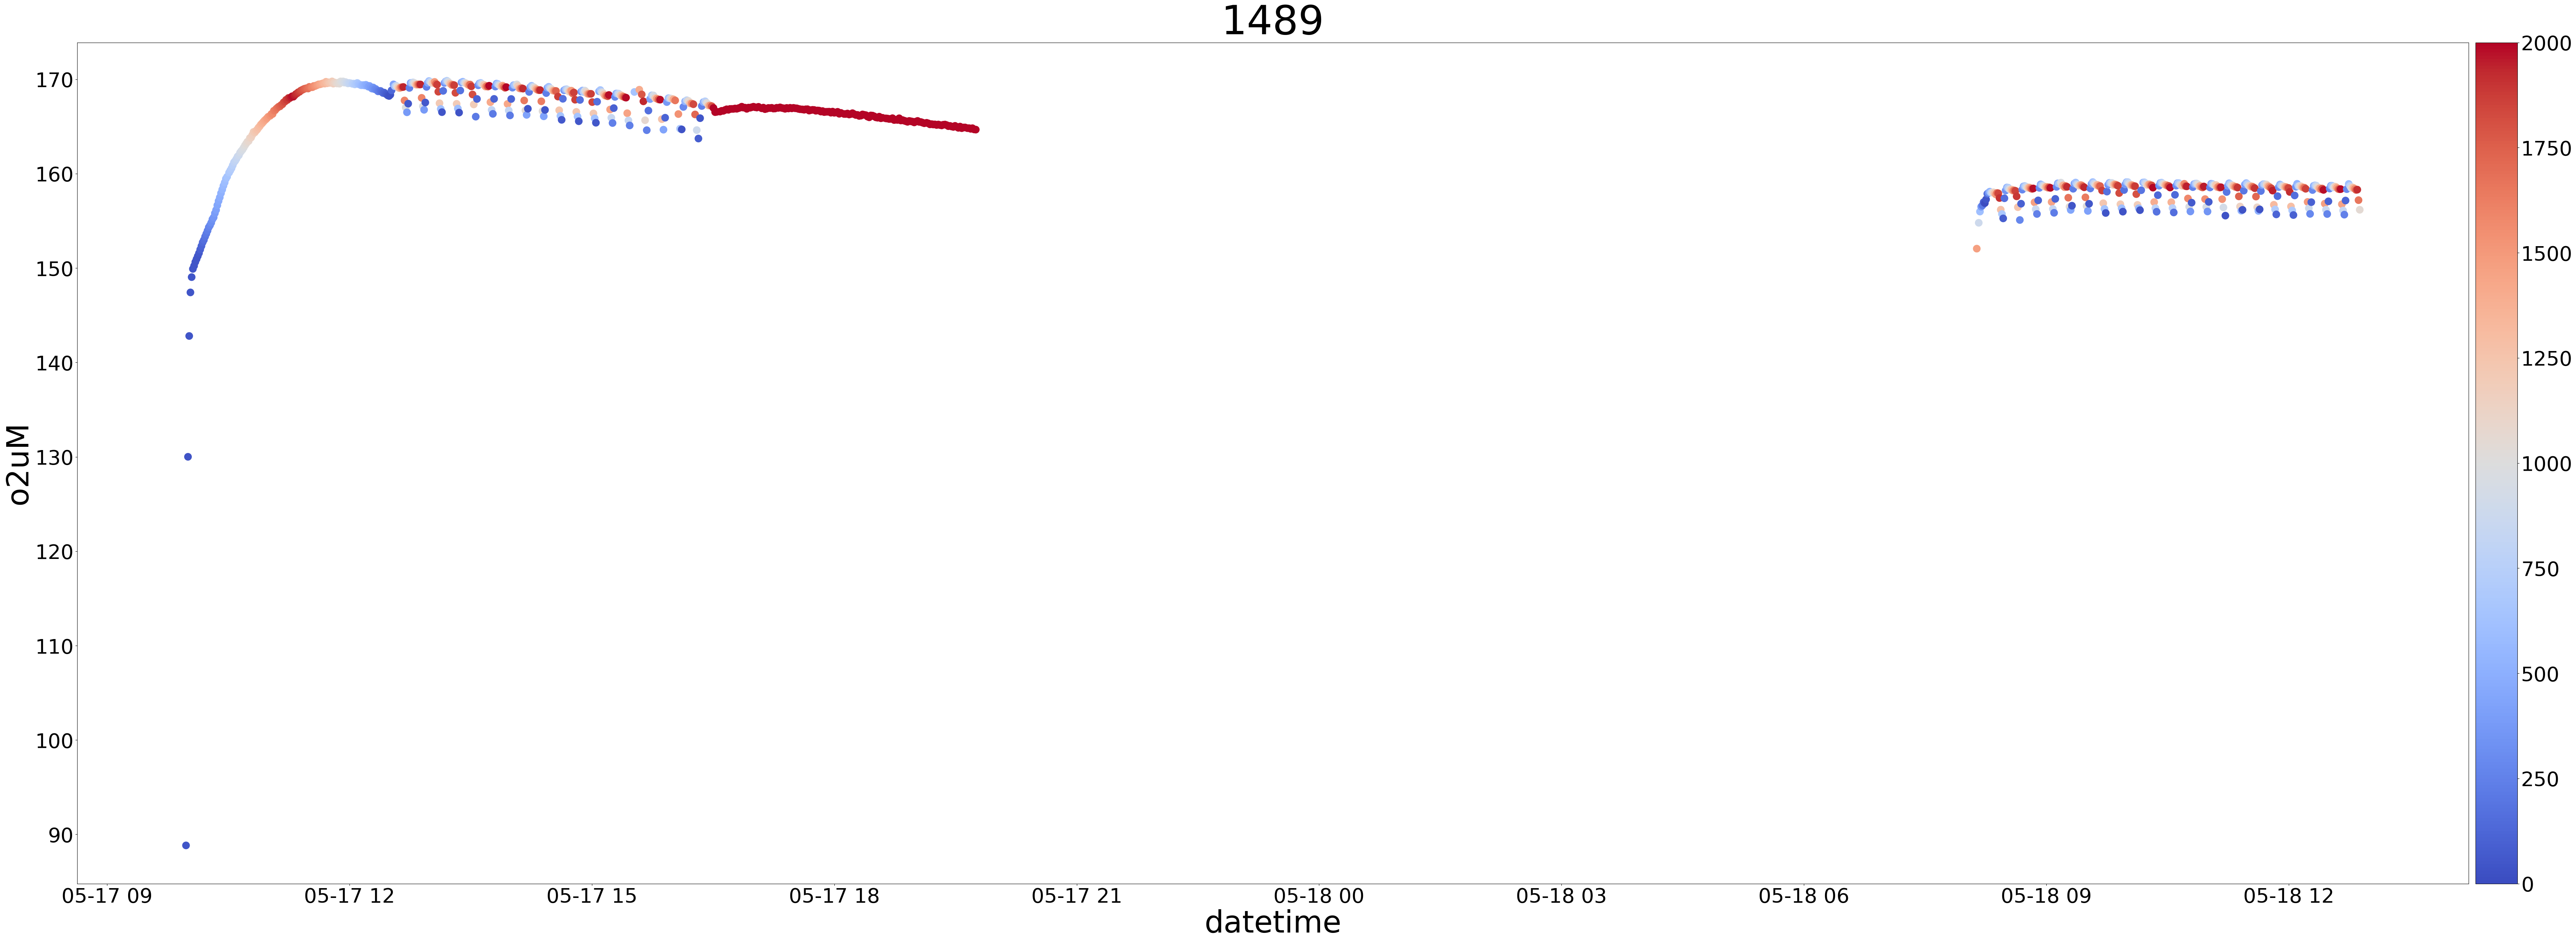

In [ ]:
# colorbar scatter plot for o2uM 

fig, ax= plt.subplots()
fig.set_size_inches(100, 30) #Made a little smaller (200 -> 100)
ax.scatter(date, O2uM, s= 200, c= df['PRES'], cmap= 'coolwarm')
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('o2uM', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=2000)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', pad= 0.0025)
cbar.ax.tick_params(labelsize=40)